In [1]:
import geopandas as gpd

In [2]:
from greedy import greedy

In [3]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
africa = world.loc[world.continent == 'Africa']

In [4]:
africa = africa.to_crs('ESRI:102022')

/Users/martin/anaconda3/envs/geo_dev/lib/python3.8/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


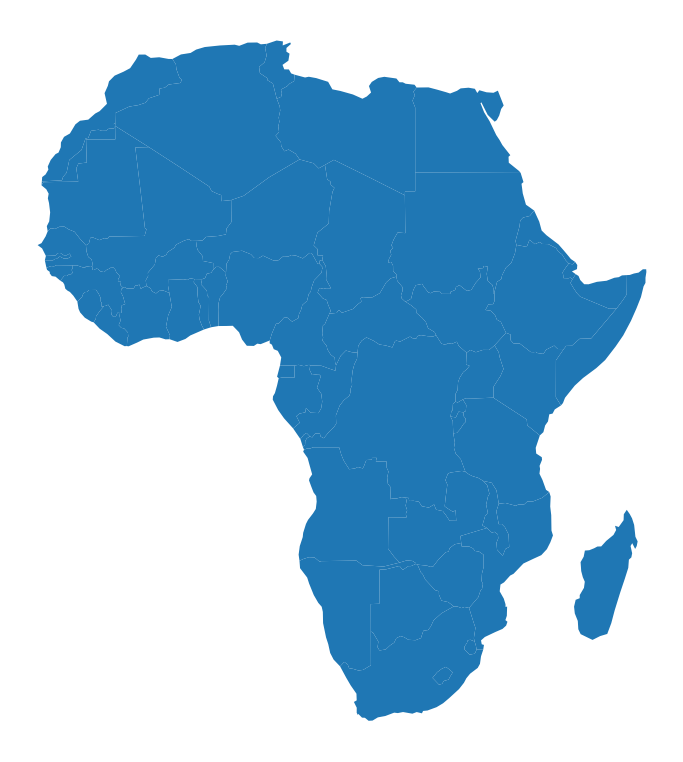

In [8]:
ax = africa.plot(figsize=(12, 16))
ax.set_axis_off()

In [9]:
africa['greedy_default'] = greedy(africa)

In [64]:
africa.head(5)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,greedy_default,greedy_area,greedy_distance,greedy_smallest_last,greedy_largest_first,greedy_s
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((922537.240 -114575.437, 939987.876 -...",1,1,1,1,1,3
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-3534685.828 3115442.123, -3534537.0...",0,2,2,1,1,1
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((448900.867 -534810.534, 467307.838 -...",0,0,0,0,0,1
12,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((1717804.547 -205991.843, 1657142.658...",1,1,0,2,2,3
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((1468849.544 -559808.809, 1321049.240...",4,3,3,0,0,1


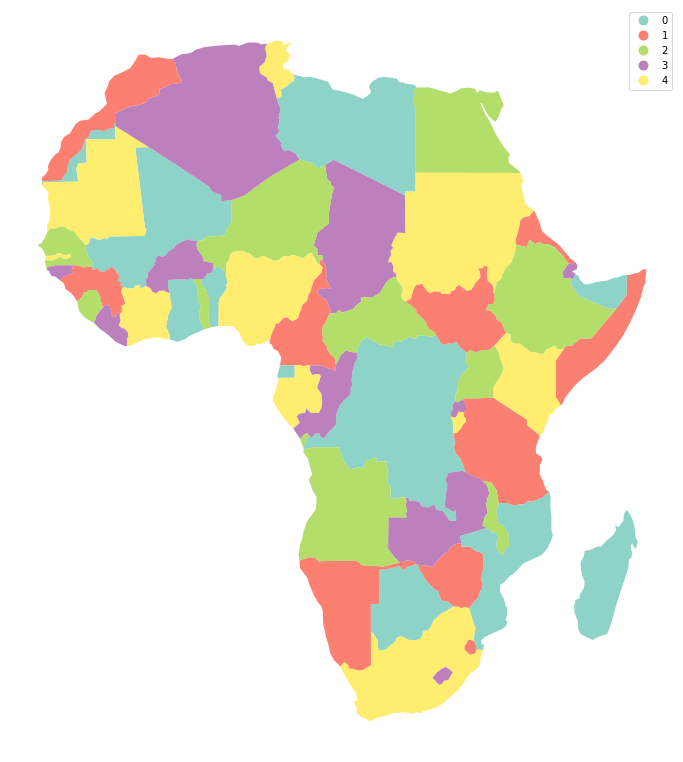

In [53]:
ax = africa.plot('greedy_default', categorical=True, figsize=(12, 16), cmap='Set3', legend=True)
ax.set_axis_off()

In [11]:
africa['greedy_area'] = greedy(africa, strategy='balanced', balance='area')

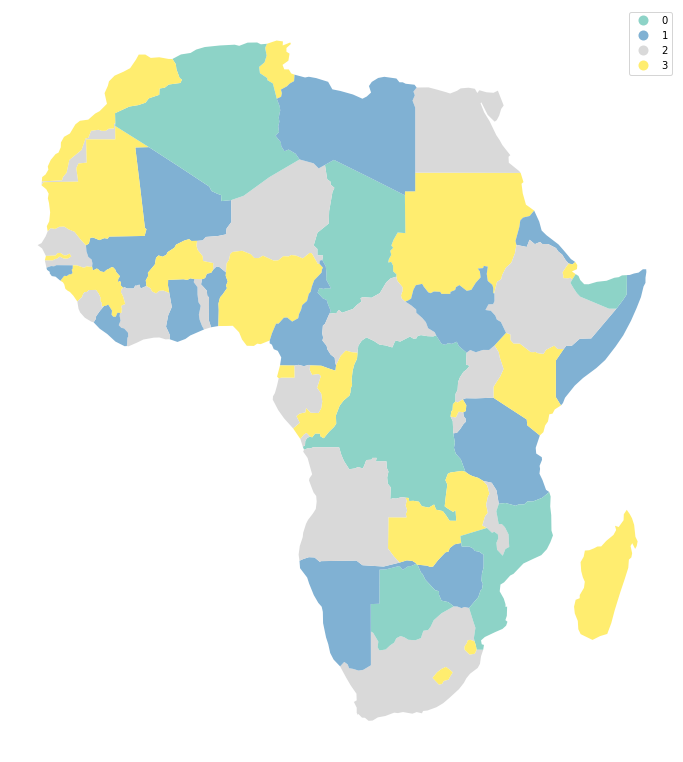

In [54]:
ax = africa.plot('greedy_area', categorical=True, figsize=(12, 16), cmap='Set3', legend=True)
ax.set_axis_off()

In [59]:
africa['greedy_distance'] = greedy(africa, strategy='balanced', balance='distance')

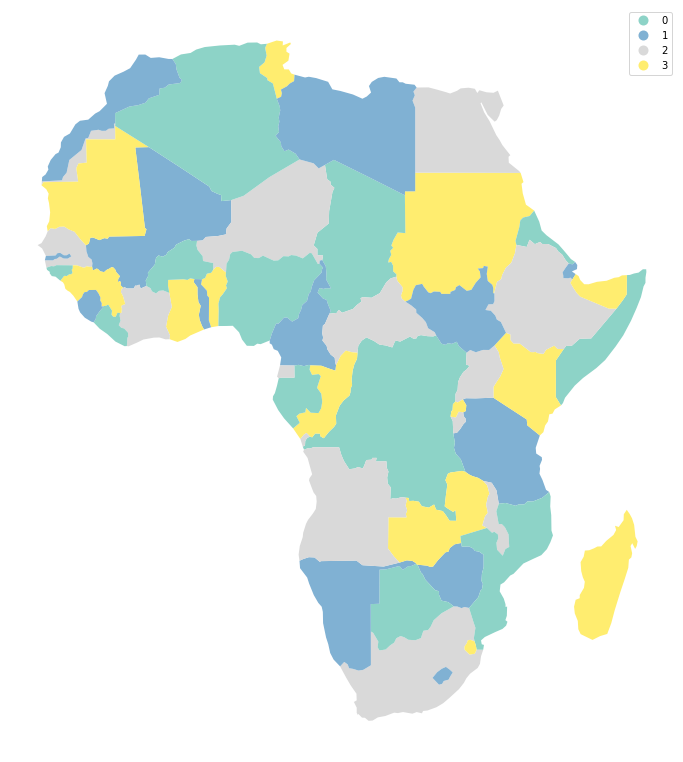

In [60]:
ax = africa.plot('greedy_distance', categorical=True, figsize=(12, 16), cmap='Set3', legend=True)
ax.set_axis_off()

In [42]:
africa['greedy_largest_first'] = greedy(africa, strategy='largest_first')

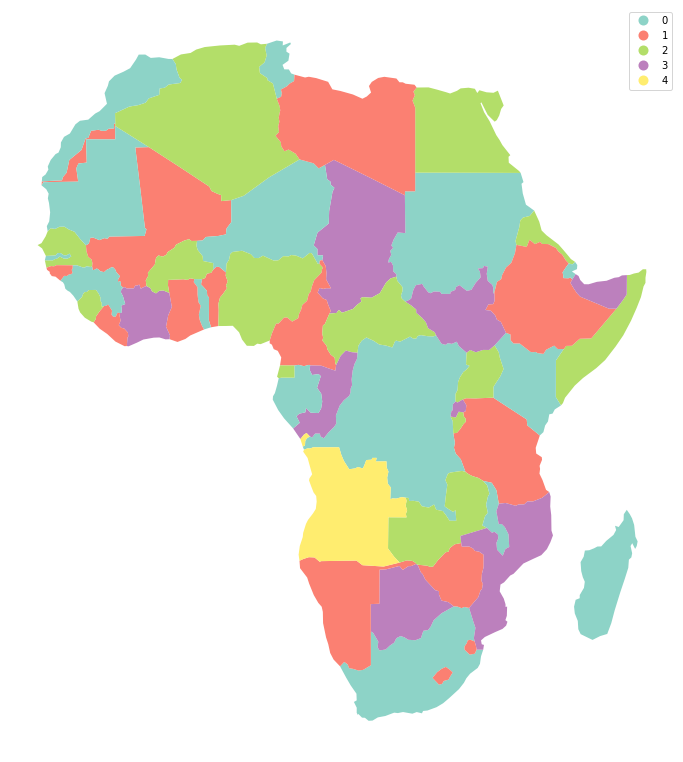

In [56]:
ax = africa.plot('greedy_largest_first', categorical=True, figsize=(12, 16), cmap='Set3', legend=True)
ax.set_axis_off()

In [61]:
africa['greedy_s'] = greedy(africa, strategy='smallest_last')

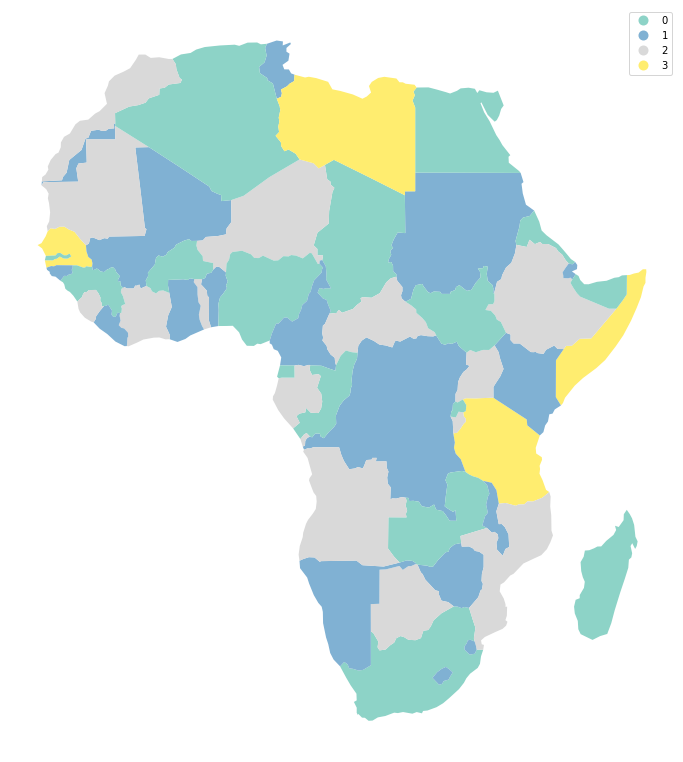

In [62]:
ax = africa.plot('greedy_s', categorical=True, figsize=(12, 16), cmap='Set3', legend=True)
ax.set_axis_off()